## Projeto Machine Learning III

Autores:
- Ana Carolina Ferreira
- Diego Dio
- Fernando Brancher
- Marília Melo
- Mayara Medeiros

## Apresentação

**Objetivo:**

Criar modelos de classificação para prever se o tomador do empréstimo ficará inadimplente ou não.

Fonte de dados: https://www.kaggle.com/datasets/laotse/credit-card-approval

*Encontrei esse dicionário no projeto de outra pessoa, não é oficial, mas deve ajudar* (remover antes da apresnetação)

- **ID** = Customer ID of Applicant
- **year** = Year of Application
- **loan limit** = maximum avaliable amount of the loan allowed to be taken
- **Gender** = sex type
- **approv_in_adv** = Is loan pre-approved or not
- **loan_type** = Type of loan
- **loan_purpose** = the reason you want to borrow money
- **Credit_Worthiness** = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
- **open_credit** = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
- **business_or_commercial** = Usage type of the loan amount
- **loan_amount** = The exact loan amount
- **rate_of_interest** = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
- **Interest_rate_spread** = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
- **Upfront_charges** = Fee paid to a lender by a borrower as consideration for making a new loan
- **term** = the loan's repayment period
- **Neg_ammortization** = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
- **interest_only** = amount of interest only without principles
- **lump_sum_payment** = is an amount of money that is paid in one single payment rather than in installments.
- **property_value** = the present worth of future benefits arising from the ownership of the property
- **construction_type** = Collateral construction type
- **occupancy_type** = classifications refer to categorizing structures based on their usage
- **Secured_by** = Type of Collatoral
- **total_units** = number of unites
- **income** = refers to the amount of money, property, and other transfers of value received over a set period of time
- **credit_type** = type of credit
- **co-applicant_credit_type** = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
- **age** = applicant's age
- **submission_of_application** = Ensure the application is complete or not
- **LTV** = life-time value (LTV) is a prognostication of the net profit
- **Region** = applicant's place
- **Security_Type** = Type of Collatoral
- **status** = Loan status (Approved/Declined)
- **dtir1** = debt-to-income ratio (percentage of income that will be compromised with the loan)

### Etapas projeto (apagar para apresentação final):
- Verificar uso de over/undersampling (não sei como faz nem onde se encaixaria)
- Considerando que temos mais de 150mil amostras, fazer uma subamostragem para análise exploratória, etapas subsequentes de testes de modelo, usando o dataset completo somente para rodar o modelo final com os hiperparâmetros já definidos. 
- Análise Exploratória inicial (atualizar análise após divisão do dataset em treino/teste)
    - describe
    - Mostrar dados em gráficos ao invés de tabelas
    - Distribuições de variáveis categóricas e numéricas
    - heatmap de correlação entre variáveis
- Column Transformer, divisão em X_train, X_test, y_train, y_test
    - Stratify no split de treino/teste devido ao desbalanceamento
    - Scaler (ver qual usar de acordo com as distribuições dos dados)
    - OneHot/Ordinal Encoder
- Seleção de features
- PCA para redução de dimensionalidade
- Modelo não supervisionado para verificar clusters de clientes e padrões no dataset
- Teste de 3 ou 4 modelos com grid/random search (lembrar que essa parte costuma demorar)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Pré-Processamento
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer

In [2]:
#Rodar uma vez, pra ele mostrar todas as colunas
pd.set_option('display.max_columns', 50)

## 1. Leitura, tratamento e padronização dos dados

In [3]:
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
print(df.shape)
df.info()

(148670, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges 

### Características do dataset:
- 148670 linhas
- 34 colunas
    - 1 coluna ID
    - 1 coluna target - Status
    - 21 colunas com dados categóricos
    - 11 colunas com dados numéricos

### Análise dos dados faltantes

In [5]:
df.isnull().sum().sort_values(ascending=False).head(15)
# Fazer o tratamento dos nulos no dataset já separado em treino e teste.
# Por exemplo, usar a média de uma coluna pra preencher os dados faltantes no treino,
# e usar a mesma média do treino pra preencher os dados faltantes no teste. (Evita o dataleakage)

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
property_value               15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
Region                           0
dtype: int64

In [6]:
# Valores nulo quando Status = 0 ou = 1
df_status0 = df[df['Status'] == 0].copy()
df_status1 = df[df['Status'] == 1].copy()

indices = df_status1.isna().sum().index
valores_status0 = np.array(df_status0.isna().sum())
valores_status1 = np.array(df_status1.isna().sum())
df_valores_nulos = pd.DataFrame({'coluna': indices, 'Status 0': valores_status0, 'Status 1': valores_status1})
df_valores_nulos

,coluna,Status 0,Status 1
0,ID,0,0
1,year,0,0
2,loan_limit,2463,881
3,Gender,0,0
4,approv_in_adv,667,241
5,loan_type,0,0
6,loan_purpose,99,35
7,Credit_Worthiness,0,0
8,open_credit,0,0
9,business_or_commercial,0,0


Analisando o dataframe acima, observamos que:
- Em ```rate_of_interest``` e ```Interest_rate_spread``` todos os dados nulos estão nos dados com **Status 1**
- Em ```Upfront_charges```, ```property_value``` e  ```LTV``` a grande maioria dos nulos estão nos dados com **Status 1**
- Em ```term```, ```income``` e ```dtir1``` os dados nulos estão bem distribuídos

**Plano de Ação:**

Preencher os dados faltantes com que estratégia?
- Média de cada feature?
- Igual a zero ?
- kNN imputation: estratégia que li [nessa matéria](https://www.blog.dailydoseofds.com/p/the-most-overlooked-problem-with-768?utm_source=post-email-title&publication_id=1119889&post_id=135561523&isFreemail=true&utm_medium=email) de uma newsletter que sigo

<img src='https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F0d8bb4da-0c62-4492-8dfd-b30f5530d8ca_2973x3153.jpeg' width='500'>

Mayara: Gostei da ideia de usar o KNNImputer

### Atualização de passos:
Se utilizarmos o KNNImputer sugerido pelo Fernando, os passos a serem seguidos no dataset serão:
- Divisão do dataset em treino e teste (podemos manter o X e y juntos como o professor mostrou na última aula)
- Pipeline/ColumnTransformer com:
    - Scaler (Observar distribuição de dados e outliers (precisamos fazer um boxplot com as variáveis numéricas) para escolher o melhor scaler)
    - OneHot/Ordinal encoder para transformação das colunas categóricas em número
    - KNNImputer para preenchimento dos dados faltantes
- 2 primeiros passos pode ser um column transformer, o 3o passo precisa seguir num pipeline após os 2 primeiros
- fit_transform no X_train, transform no X_test

In [7]:
# Drop coluna 'year' que apresenta valor único em todo dataset e 'ID' que é identificador
df.drop(columns=['ID', 'year'], inplace=True)

# Drop de nan em colunas que tenham dados faltantes inferior a 5% das linhas totais do dataset
df.dropna(subset=['loan_limit', 'approv_in_adv', 'submission_of_application', 'age', 'loan_purpose', 'Neg_ammortization', 'term'], inplace=True)
df.isnull().sum().sort_values(ascending=False).head(15)

# Verficado se após essa remoção de linhas o desbalanceamento não aumenta e está tudo ok, mantém o mesmo.

Upfront_charges              38307
rate_of_interest             35255
Interest_rate_spread         35255
dtir1                        23305
LTV                          14597
property_value               14597
income                        8834
open_credit                      0
business_or_commercial           0
Status                           0
Security_Type                    0
Region                           0
approv_in_adv                    0
submission_of_application        0
age                              0
dtype: int64

In [8]:
# O que May mandou no grupo e concordo: 
#       "Tem aquelas 33 amostras que são distoantes do resto do dataset pra várias colunas diferentes. Podemos simplesmente excluir essas linhas.
#        E aí tem algumas colunas que a variação é só essa dos 33 e poderíamos dropar elas.

df = df[df["construction_type"] != "mh"]
df.drop(columns=["construction_type", "Secured_by", "Security_Type"], inplace=True)

In [9]:
# Talvez antes de separa em treino/teste deveríamos fazer uma subsample dos dados com status = 0. Pra balancear um pouco mais os dados.

In [10]:
X = df.drop(columns='Status')
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Tratamento dos dados faltantes

In [11]:
df.isnull().sum().sort_values(ascending=False).head(10)

Upfront_charges              38274
rate_of_interest             35222
Interest_rate_spread         35222
dtir1                        23302
property_value               14597
LTV                          14597
income                        8831
Status                           0
Region                           0
submission_of_application        0
dtype: int64

In [12]:
# Separando as features de acordo com os tratamentos

# Features categóricas nominais: 
# precisa tratar: apenas ['loan_purpose'] 
features_cat = list(df.select_dtypes(exclude=np.number).columns)
features_cat.remove('total_units')
features_cat.remove('age')

# Define a ordem para o OrdinalEncoder
units_order = ['1U', '2U', '3U', '4U']
age_order = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74']
# Features categóricas ordinais: 
features_ord = ['total_units','age']


# Features numéricas:
# precisa tratar: Upfront_charges, rate_of_interest, Interest_rate_spread, dtir1, property_value, LTV, income
features_num = list(df.select_dtypes(include=np.number).columns)
features_num.remove('Status')

In [13]:
#Criando pipelines
pipe_feat_cat = Pipeline([
    ('input_cat', SimpleImputer(strategy = "most_frequent")), # Tive que usar o SimpleImputer pois o KNNImputer é pra numéricas
    ('encod_cat', OneHotEncoder(drop='first', sparse_output=False))
])

pipe_feat_ord = Pipeline([
    ('encod_ord', OrdinalEncoder(categories=[units_order, age_order]))
])

pipe_feat_num = Pipeline([
    ('scaler', RobustScaler()),
    ('input_num', SimpleImputer(strategy = "mean")) # Opção 2: ('input_num', KNNImputer(n_neighbors = 2))
])

# Aplica cada pipeline nas respectivas colunas
pre_processamento = ColumnTransformer([
        ('transf_cat', pipe_feat_cat, features_cat),
        ('transf_ord', pipe_feat_ord, features_ord),
        ('transf_num', pipe_feat_num, features_num)
], remainder='passthrough')

# Para que o output seja um datafram do pandas
pre_processamento.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('transf_cat',
                                 Pipeline(steps=[('input_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encod_cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['loan_limit', 'Gender', 'approv_in_adv',
                                  'loan_type', 'loan_purpose',
                                  'Credit_Worthiness', 'open_credit',
                                  'business_or_commercial', 'Neg_ammortization',
                                  '...
                                                  OrdinalEncoder(categories=[['1U',
                                                                              '2U',
                                                                              '3U',
                                                                              '4U'],
                                                                             ['<25',
                                                                              '25-34',
                                                                              '35-44',
                                                                              '45-54',
                                                                              '55-64',
                                                                              '65-74',
                                                                              '>74']]))]),
                                 ['total_units', 'age']),
                                ('transf_num',
                                 Pipeline(steps=[('scaler', RobustScaler()),
                                                 ('input_num',
                                                  SimpleImputer())]),
                                 ['loan_amount', 'rate_of_interest',
                                  'Interest_rate_spread', 'Upfront_charges',
                                  'term', 'property_value', 'income',
                                  'Credit_Score', 'LTV', 'dtir1'])])

In [14]:
# Column Transform: dados de treino
X_train_transformed = pre_processamento.fit_transform(X_train)

new_columns = list(X_train_transformed.columns)
for column in range(len(new_columns)):
    new_columns[column] = new_columns[column][12:]

X_train_transformed.columns = new_columns

X_train_transformed.head(3)

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,occupancy_type_pr,occupancy_type_sr,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,total_units,age,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
80716,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.625,-0.320000,-0.469964,0.424464,0.0,0.485714,-0.1500,-0.089552,0.031917,-0.071429
12817,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.625,-0.486667,-0.083011,0.581491,-180.0,0.514286,15.7125,0.203980,-0.017282,-1.428571
37515,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.250,0.064996,0.073517,0.146875,0.0,0.232409,0.2250,-0.164179,-0.093862,-0.090063


In [15]:
# Column Transform: dados de treino
X_test_transformed = pre_processamento.transform(X_test)

new_columns = list(X_test_transformed.columns)
for column in range(len(new_columns)):
    new_columns[column] = new_columns[column][12:]

X_test_transformed.columns = new_columns

X_test_transformed.head(2)

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,occupancy_type_pr,occupancy_type_sr,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,total_units,age,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
2661,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.791667,1.333333,0.416631,0.510349,0.0,2.085714,0.6625,-0.273632,-0.458263,0.142857
14325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.583333,1.013333,0.568602,-0.614920,0.0,0.142857,0.7875,0.666667,0.703519,-0.214286


In [16]:
# Estudar um pocuo mais das features (não entendi tão bem seu significado): rate_of_interest, Interest_rate_spread, Neg_ammortization, interest_only,

# Analisar necessidade da feature: "Interest_rate_spread" (muitos nulos e parece não ser tão relevante pro modelo) 

### Análise do target

In [ ]:
df['Status'].value_counts(normalize=True)

Status
0    0.753555
1    0.246445
Name: proportion, dtype: float64

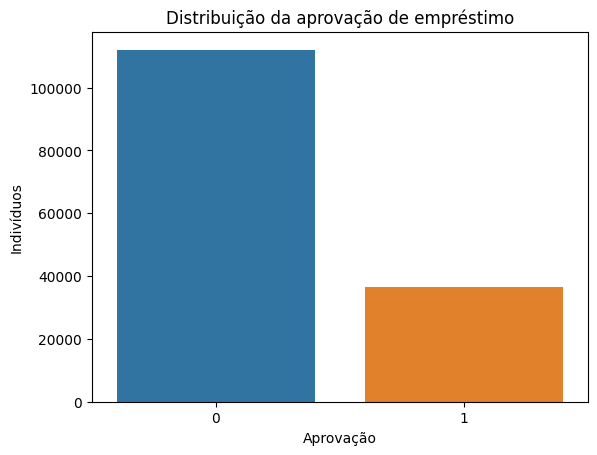

In [ ]:
# Análise de balanceamento do target do dataset
sns.countplot(data=df, x='Status')
plt.title('Distribuição da aprovação de empréstimo')
plt.ylabel('Indivíduos')
plt.xlabel('Aprovação')
plt.show()
# df['Status'].value_counts(normalize=True).plot(kind='bar', title='Distribuição da aprovação de empréstimo',
#                                                ylabel='Porcentagem',
#                                                xlabel='Aprovação')

Nosso target ```Status``` é desbalanceado, podemos pensar em maneira de equilibrar a distribuição. 

Ideias:

- *Undersampling:* remover parte das observações da classe 0 para balancear. Sugestão, algo em torno de 60-40% acho que já seria OK.
- *Oversamplig:* criar dados sintéticos para a classe 1, até um o momento de criar uma distribuição mais balanceada.

Como temos um bom valor na classe 1, acredito que o *undersampling* já nos ajude, para evitar a criação de dados sintéticos.

Colunas com dados faltantes: ```['loan_limit', 'approv_in_adv', 'loan_purpose', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'property_value', 'income', 'age', 'submission_of_application', 'LTV', 'dtir1']```

## 2. Visualização das distribuições

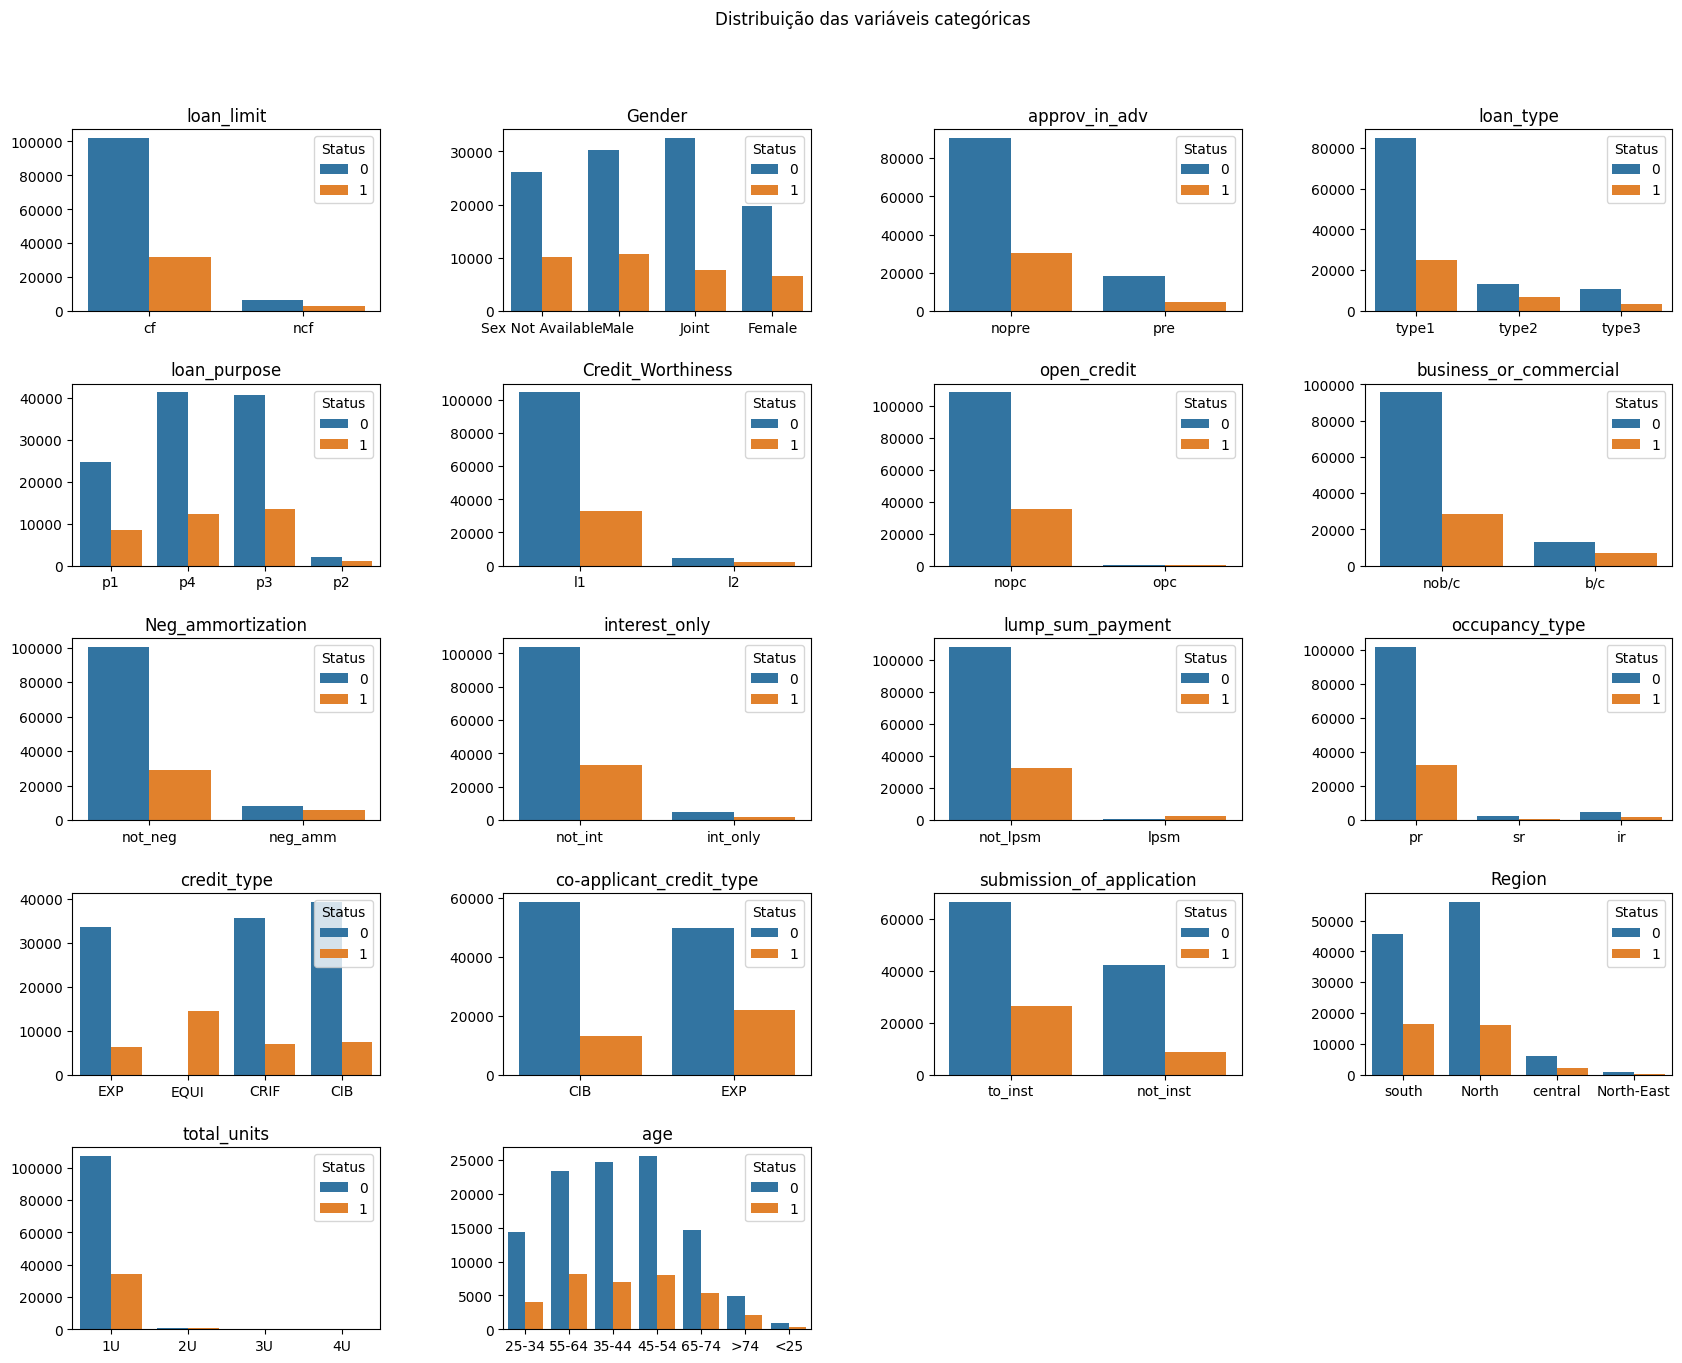

In [153]:
# Distribuição das variáveis categóricas
category_list = ["loan_limit", "Gender", "approv_in_adv", "loan_type", "loan_purpose", "Credit_Worthiness", "open_credit", "business_or_commercial", "Neg_ammortization", "interest_only", \
                 "lump_sum_payment", "occupancy_type", "credit_type", "co-applicant_credit_type", "submission_of_application", "Region", "total_units", "age"]
count = 1
fig = plt.figure(figsize=(20,15))

for category in category_list:
    fig.add_subplot(5,4, count)
    sns.countplot(data = df,
                  x=category, 
                  hue='Status')
    plt.ylabel('')
    plt.xlabel('')
    plt.title(category)
    count += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    
plt.suptitle('Distribuição das variáveis categóricas')
plt.show()

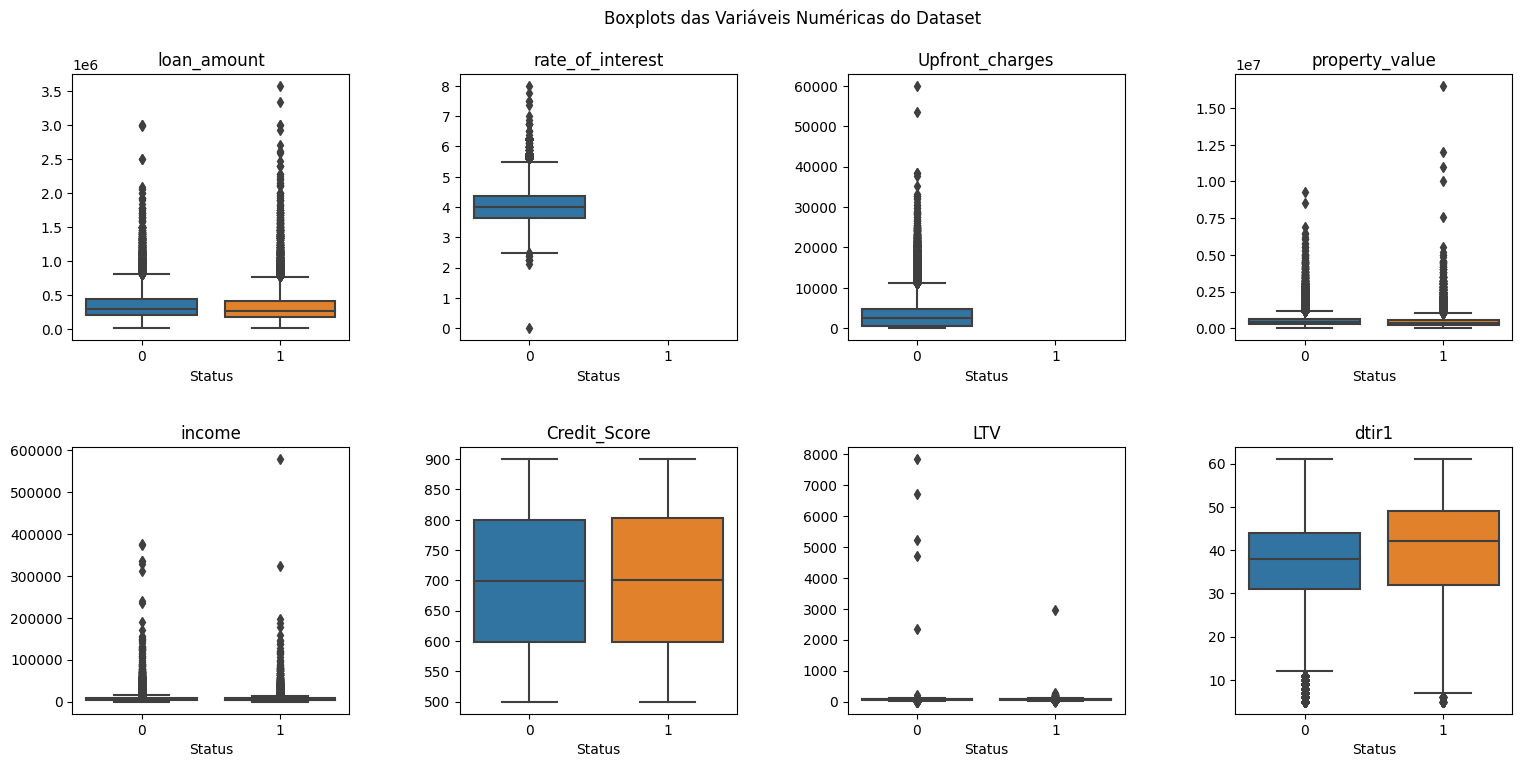

In [155]:
# Boxplot das features
numeric_list = ["loan_amount", "rate_of_interest", "Upfront_charges", "property_value", "income", "Credit_Score", "LTV", "dtir1"]

fig= plt.figure(figsize=(18,8))

for number, category in enumerate(numeric_list, start=1):
    ax = fig.add_subplot(2,4,number)
    sns.boxplot(data=df, y=category, x='Status')
    plt.title(category)
    plt.xlabel('Status')
    ax.set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Boxplots das Variáveis Numéricas do Dataset')
plt.show()

Analisando os dados expressos nos boxplots acima, além do fato de várias features apresentarem vários outliers, nenhuma distribuição se destaca.

Apenas ```dtir1``` tem ma leve disparidade no intervalo interquatil.

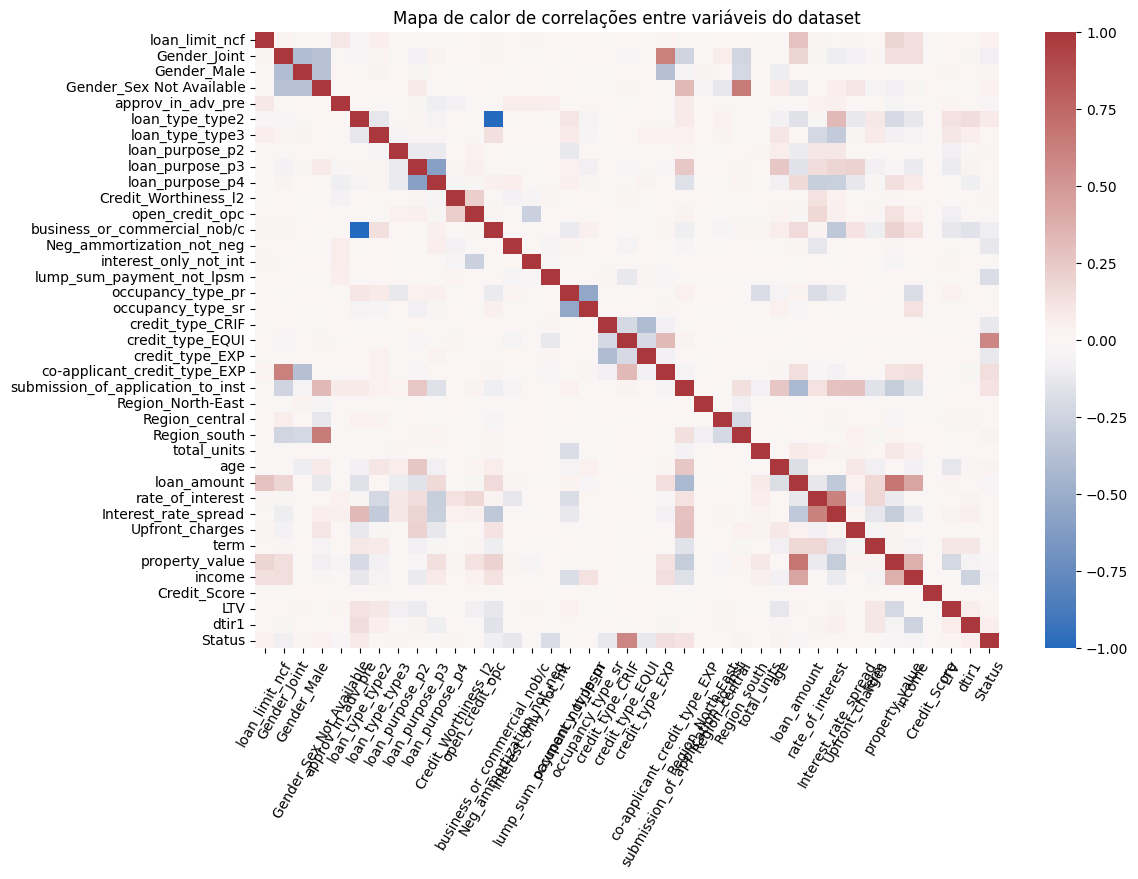

In [166]:
X_treino = X_train_transformed.copy()
X_treino['Status'] = y_train

# Correlação e heatmap das features e target
plt.figure(figsize=(12,8))
sns.heatmap(X_treino.corr(), cmap='vlag')
plt.title('Mapa de calor de correlações entre variáveis do dataset')
plt.xticks(rotation=60)
plt.show()

In [22]:
# Valores Status = 0 ou = 1
df_status0 = df[df['Status'] == 0].copy()
df_status1 = df[df['Status'] == 1].copy()

indices = df_status1.isna().sum().index
valores_status0 = np.array(df_status0.sum())
valores_status1 = np.array(df_status1.sum())
df_valores_status = pd.DataFrame({'coluna': indices, 'Status 0': valores_status0, 'Status 1': valores_status1})

In [27]:
# Será que as colunas abaixo devam ser removidas ? 
# Elas só apresentam dados para o Status = 0, e não para o Status = 1.
# Abaixo está a média de cada coluna, separado em status
df_valores_status.loc[9:11]

,coluna,Status 0,Status 1
9,rate_of_interest,439069.675,0.0
10,Interest_rate_spread,47645.0459,0.0
11,Upfront_charges,341377243.6,0.0
